In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/dataset/Caries_dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [62]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [63]:
train_path = "Caries_dataset/train"
test_path = "Caries_dataset/test"

In [64]:
model = Sequential()

model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation="relu"))
#model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.50))
model.add(Flatten())

model.add(Dense(5000, activation = "relu"))
model.add(Dense(1024, activation = "relu"))
# model.add(Dense(512,activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 32)       

In [65]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [66]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 2,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 2,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 118 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [67]:
train_generator[0][0].shape

(2, 100, 100, 3)

In [70]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 10,
                   epochs = 10,
                   validation_data = test_generator,
                   validation_steps =10)

Epoch 1/10


<ipython-input-70-93064566fbbb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


10/10 [==============================] - 4s 379ms/step - loss: 0.5767 - accuracy: 0.7500 - val_loss: 0.6517 - val_accuracy: 0.6500
Epoch 2/10
10/10 [==============================] - 4s 379ms/step - loss: 0.4166 - accuracy: 0.9000 - val_loss: 0.7524 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 4s 381ms/step - loss: 0.5365 - accuracy: 0.8000 - val_loss: 0.6792 - val_accuracy: 0.6500
Epoch 4/10
10/10 [==============================] - 4s 396ms/step - loss: 0.4426 - accuracy: 0.8500 - val_loss: 0.7508 - val_accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 4s 399ms/step - loss: 0.6011 - accuracy: 0.7500 - val_loss: 0.6077 - val_accuracy: 0.7000
Epoch 6/10
10/10 [==============================] - 4s 392ms/step - loss: 0.5607 - accuracy: 0.7500 - val_loss: 0.6601 - val_accuracy: 0.6500
Epoch 7/10
10/10 [==============================] - 4s 377ms/step - loss: 0.6235 - accuracy: 0.7000 - val_loss: 0.7099 - val_accuracy: 0.6000
Epoch 8/10
10/10 

In [5]:
from keras.models import load_model

model.save("tooth5.h5")

In [6]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_generator)

In [28]:
b=predictions[8]
print(b)
np.argmax(b)

[0.5814554  0.41854456]


0

In [8]:
from keras.models import load_model
model=load_model('tooth2.h5')

import numpy as np 
from keras.preprocessing import image
test_image = image.load_img("Caries_dataset/test/caries/22.jpg", target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = "carries "
    print(prediction)
else:
    prediction = "healthy "
    print(prediction)
print(result)

healthy 
[[9.9998927e-01 1.0777145e-05]]


In [21]:
catogori = ["carries", "healthy"]
import numpy as np # linear algebra
import matplotlib.pyplot as plt

def prepare(f):
    imgs=100
        import cv2
    img_array=cv2.imread(f)
    new_array=cv2.resize(img_array,(imgs,imgs))
    return new_array.reshape(-1, imgs,imgs,3)



In [22]:
catogori = ["carries", "healthy"]
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import cv2

prep=[prepare('Caries_dataset/test/caries/21.jpg')]
prediction=model.predict(prep)

print(catogori[np.argmax(prediction)])
print(prediction)


carries
[[1.0000000e+00 4.3478295e-08]]


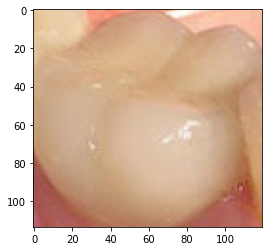

healthy
1
[[1.0000000e+00 1.9410204e-11]]


In [23]:
prep=[prepare('Caries_dataset/test/no-caries/n12.jpg')]

img = load_img("Caries_dataset/test/no-caries/n12.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prediction=model.predict(prep)
print(catogori[int(prediction[0][0])])
print(int(prediction[0][0]))
print(prediction)

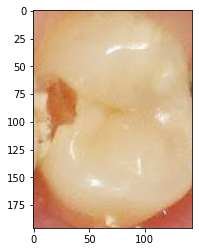

carries
[[1.0000000e+00 1.2289066e-12]]


In [24]:
img = load_img("Caries_dataset/test/caries/31.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('Caries_dataset/test/caries/31.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction)])
print(prediction)


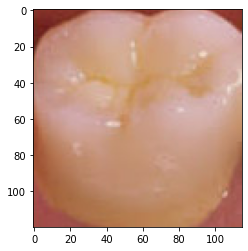

carries
[[1.0000000e+00 1.9580518e-10]]


In [26]:
img = load_img("Caries_dataset/test/no-caries/n16.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('Caries_dataset/test/no-caries/n16.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction)])
print(prediction)


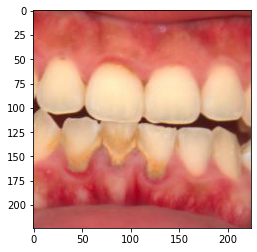

carries
[[1.0000000e+00 4.5539073e-11]]


In [28]:
img = load_img("Caries_dataset/test/caries/54.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('Caries_dataset/test/caries/54.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction[0])])
print(prediction)


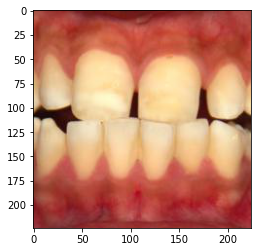

carries
[[1.000000e+00 4.385048e-12]]


In [29]:
img = load_img("Caries_dataset/test/caries/82.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('Caries_dataset/test/caries/82.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction[0])])
print(prediction)


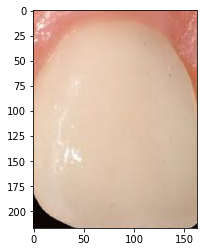

healthy
1
[[1.0000000e+00 5.2460906e-13]]


In [43]:
prep=[prepare('Caries_dataset/test/no-caries/n15.jpg')]

img = load_img("Caries_dataset/test/no-caries/n15.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prediction=model.predict(prep)
print(catogori[int(prediction[0][0])])
print(int(prediction[0][0]))
print(prediction)

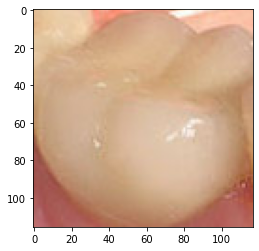

healthy
1
[[1.0000000e+00 2.2232782e-11]]


In [44]:
prep=[prepare('Caries_dataset/test/no-caries/n14.jpg')]

img = load_img("Caries_dataset/test/no-caries/n14.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prediction=model.predict(prep)
print(catogori[int(prediction[0][0])])
print(int(prediction[0][0]))
print(prediction)

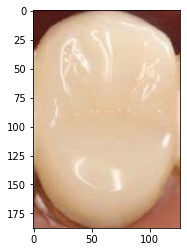

healthy
1
[[1.00000000e+00 1.04171846e-13]]


In [53]:
prep=[prepare('Caries_dataset/train/no-caries/n10.jpg')]

img = load_img("Caries_dataset/train/no-caries/n10.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prediction=model.predict(prep)
print(catogori[int(prediction[0][0])])
print(int(prediction[0][0]))
print(prediction)

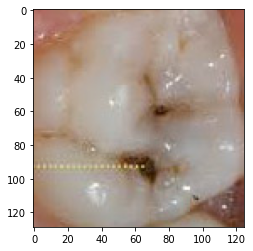

carries
[[1.000000e+00 3.657721e-12]]


In [54]:
img = load_img("Caries_dataset/test/caries/29.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('Caries_dataset/test/caries/29.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction[0])])
print(prediction)


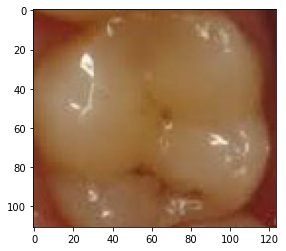

carries
[[1.0000000e+00 4.3478295e-08]]


In [51]:
img = load_img("Caries_dataset/test/caries/21.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('Caries_dataset/test/caries/21.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction[0])])
print(prediction)


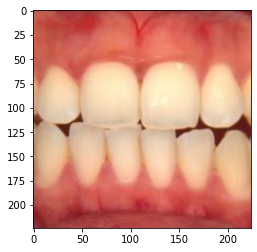

carries
[[1.000000e+00 1.501032e-11]]


In [59]:
img = load_img("Caries_dataset/test/no-caries/83.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('Caries_dataset/test/no-caries/83.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction[0])])
print(prediction)



In [ ]:
img = load_img("teeth_dataset/custom/healthy4.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

prep=[prepare('teeth_dataset/custom/healthy4.jpg')]
prediction=model.predict(prep)
print(catogori[np.argmax(prediction[0])])
print(prediction[0])


In [38]:
!pip install tf-nightly

  Using cached tf_nightly-2.12.0.dev20221106-cp38-cp38-win_amd64.whl (2.0 kB)


ERROR: Could not find a version that satisfies the requirement tf-nightly-intel==2.12.0-dev20221106; platform_system == "Windows" (from tf-nightly) (from versions: 2.10.0.dev20220524, 2.10.0.dev20220619, 2.10.0.dev20220627, 2.10.0.dev20220628, 2.10.0.dev20220629, 2.10.0.dev20220630, 2.10.0.dev20220701, 2.10.0.dev20220702, 2.10.0.dev20220703, 2.10.0.dev20220704, 2.10.0.dev20220705, 2.10.0.dev20220706, 2.10.0.dev20220707, 2.10.0.dev20220708, 2.10.0.dev20220709, 2.10.0.dev20220711, 2.10.0.dev20220712, 2.10.0.dev20220714, 2.10.0.dev20220715, 2.10.0.dev20220716, 2.10.0.dev20220717, 2.10.0.dev20220718, 2.10.0.dev20220719, 2.10.0.dev20220720, 2.10.0.dev20220721, 2.10.0.dev20220722, 2.10.0.dev20220723, 2.10.0.dev20220724, 2.10.0.dev20220725, 2.10.0.dev20220726, 2.10.0.dev20220728, 2.10.0.dev20220729, 2.11.0.dev20220730, 2.11.0.dev20220731, 2.11.0.dev20220801, 2.11.0.dev20220802, 2.11.0.dev20220803, 2.11.0.dev20220804, 2.11.0.dev20220805, 2.11.0.dev20220806, 2.11.0.dev20220807, 2.11.0.dev202208

In [5]:
pip install opencv-python

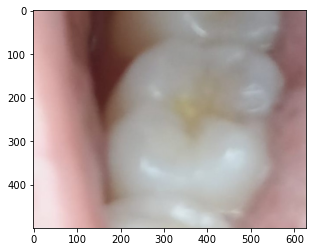

In [46]:
img = load_img("dataset/Caries_dataset/sans.jpeg")
#image= img[120:670, 10:650]
plt.imshow(img)
plt.axis("on")
plt.show()